check border of image

In [1]:
import matplotlib.pyplot as plt
import cv2 


def rotate_image( img, angle = 3):
    # get cv2 image
    # this function get an image and angle then rotate image by this angle
    height, width = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

    if img.shape[2] == 4:
        borderValue = (255,255,255,0)
    else:
        borderValue = (255,255,255)

    rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height) , borderValue = borderValue , flags=cv2.INTER_NEAREST)
    return rotated_image




im = cv2.imread("_______INS/206_lpr2/02.png" , cv2.IMREAD_UNCHANGED)
im = rotate_image( im, angle = 0)
cv2.imwrite("UUUUU1.png" , im)

True

(2160, 3840, 4)


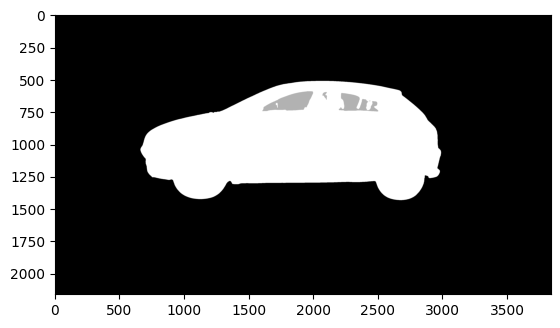

In [5]:
import matplotlib.pyplot as plt
import cv2 

im = cv2.imread("_______INS/206_lpr2/02.png" , cv2.IMREAD_UNCHANGED)
print(im.shape)
im3 = im[:,:,3]
plt.imshow(im3 , cmap="gray")

True

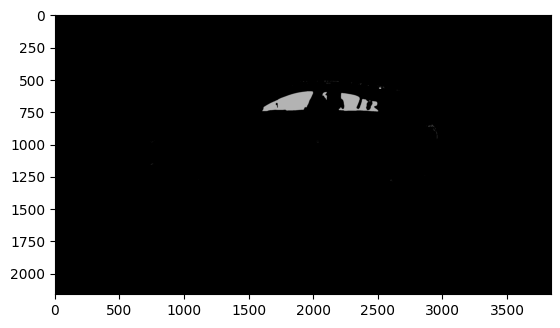

In [18]:
import numpy as np
# Create the output directory if it doesn't exist

# Threshold the image for 255 value
_, im1 = cv2.threshold(im[:,:,2], 254.5, 255, cv2.THRESH_BINARY)

im1 = 255 - im1
# Continue with the existing code

# Initialize frame count

plt.imshow(np.abs(im3 - im1) , cmap="gray")
cv2.imwrite("UUUUU1.jpg" , np.abs(im3 - im1))

In [12]:

import os
import cv2

def extract_frames(video_path, output_directory):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)
    
    # Initialize frame count
    frame_count = 0
    
    while True:
        # Read the next frame from the video
        ret, frame = video.read()
        
        # If the frame was not successfully read, then we have reached the end of the video
        if not ret:
            break
        
        # Save the frame as an image file
        output_path = os.path.join(output_directory, f"frame_{frame_count}.jpg")
        cv2.imwrite(output_path, frame)
        
        # Increment the frame count
        frame_count += 1
    
    # Release the video file
    video.release()

video_path = "runs/segment/predict/frames.avi"
output_directory = "_______INS/benz/frames"
extract_frames(video_path, output_directory)





In [11]:
from ultralytics import YOLO


model_yolo =  YOLO("model/yolov8m-seg.pt")


results = model_yolo.predict("_______INS/benz/frames.mp4" , verbose=False  , conf=.8 , save=True)
# results = results[0].cpu().numpy().boxes.data


    WARNING  stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

Results saved to runs\segment\predict


In [10]:
tuple([3]*8)

(3, 3, 3, 3, 3, 3, 3, 3)

In [2]:
from torchvision import transforms
import onnxruntime
import numpy as np 
from PIL import Image

In [3]:
sz = 420
model = onnxruntime.InferenceSession("model/angle_mobileNet_20.onnx")
transforms =  transforms.Compose([
        transforms.Resize((sz , sz)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
    ])

In [5]:
img = Image.open("1.jpg").convert('RGB')
img = transforms(img)
img = np.array(img)

img = np.expand_dims(img, 0).astype(np.float32)
    
ort_outs = model.run(None, {"input":img})

ort_outs[0][0][0]

-0.4932291

## test class

In [2]:
yaws = [5.406633534606321,
            5.590338529970505,
            12.182080640071197,
            16.15813691045502,
            20.14327984037418,
            23.774019329639238,
            33.29706128823568,
            36.37212788812101,
            40.1918854962939,
            41.83998092735989,
            48.8734557413525,
            51.13125904080177,
            57.79421033583744,
            64.29341168463613,
            68.3364080029332,
            72.49161987466061,
            78.86931093372648,
            81.07471148141403,
            82.61348409832758,
            89.16176216365994,
            93.64899762477127,
            102.19716982306224,
            102.90754867871647,
            121.75498490832227,
            144.6829434902486,
            181.86918907553834,
            186.29712224604415,
            194.07089747213985,
            202.46724523158852,
            207.24222953821587,
            213.26732758098174,
            222.4024876362589,
            225.16921257810827,
            227.79644653468196,
            229.23571383161476,
            239.77542312717077,
            249.99002379058635,
            260.44713559446467,
            269.7128889075372,
            273.63391772180415,
            281.6471141631142,
            288.40992737418003,
            292.6005622613679,
            303.68146554603953,
            305.83839642833993,
            314.07914331235867,
            326.9728272392335,
            331.66377375156696,
            333.1400753226155,
            343.63269094531313,
            346.3733521202134,
            356.74773300316787]

len(yaws)

52

In [1]:
import glob
from natsort import natsorted
from deployment.Stabilizer import Stabilizer

stab = Stabilizer("model/rtdetr-l.pt" , "model/angle_mobileNet_20.onnx")
imgs = glob.glob("_______INS/navid_android/*")

c = 0
for im in natsorted(imgs):
    c+=1
    try:
        stab.run(im ,"_______OUTS/disjoint_version/navid_android/1/"+str( c)+".json"  ,  height_fraction=0.626 , mode = 0)
    except Exception as e :
        print(">>>>> ",e)

    print(c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


In [2]:
import glob
from natsort import natsorted
from deployment.Stabilizer2 import Stabilizer2
import cv2

stab2 = Stabilizer2()
imgs = glob.glob("_______INS/navid_android/*")

c = 0
for im in natsorted(imgs):
    c+=1
    # if c == 12:
    #     continue
    try:
        stab2.run(im ,"_______OUTS/disjoint_version/navid_android/1/"+str( c)+".json" , "_______OUTS/disjoint_version/navid_android/2/"+str( c)+".png")    # (self , img_address , json_address ,  output_address )
    except Exception as e :
        print(">>>>> ",e)

    print(c)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81


## one image 

In [3]:

from deployment.Stabilizer import Stabilizer

stab = Stabilizer("model/yolov8l_9_2023.pt" , "model/angle_mobileNet_20.onnx")

stab.run("lpr2.png" ,"XX.json")


True

In [9]:
2160 * .9

1944.0

In [4]:
import glob
from natsort import natsorted
from deployment.Stabilizer2 import Stabilizer2
import cv2

stab2 = Stabilizer2()


stab2.run("lpr2.png" ,"XX.json" , "QQ.png")    # (self , img_address , json_address ,  output_address )
  

True

## to video

In [5]:
from natsort import natsorted


# write python code to make video from directory of images
import cv2
import os

def make_video_from_images(image_directory = "_______OUTS/disjoint_version/navid3_fsel/2", output_video_path="_______OUTS/disjoint_version/navid3_fsel/2/navid.mp4", fps=8):
    image_files = natsorted(os.listdir(image_directory))
    frame = cv2.imread(os.path.join(image_directory, image_files[0]))
    height, width, _ = frame.shape
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    video_writer = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    for image_file in image_files:
        image_path = os.path.join(image_directory, image_file)
        frame = cv2.imread(image_path)
        video_writer.write(frame)

    video_writer.release()

# test frameSelection


make_video_from_images()

In [ ]:
def reflect_image_in_white_region(img):
    height, width = img.shape[:2]
    border_size = 50
    new_height, new_width = height + 2*border_size, width + 2*border_size
    new_img = np.ones((new_height, new_width, img.shape[2]), np.uint8) * 255
    if img.shape[2] == 4:
        new_img[:,:,3] = 0
    new_img[border_size:height+border_size, border_size:width+border_size] = img
    new_img = cv2.copyMakeBorder(new_img, border_size, border_size, border_size, border_size, cv2.BORDER_REFLECT)
    return new_img


# Social

In [2]:
import cv2
img = cv2.imread("_SOCIAL/inp/11.jpg")

aa = stab.centerizer(img)
# aa = stab.zoomIN_zoomOut(img , 0.27)
cv2.imwrite("_SOCIAL/inp/111.jpg" , aa)

True

## test-rotate:

In [2]:
import cv2

def rotate_image( img, angle = 0):
    # get cv2 image
    # this function get an image and angle then rotate image by this angle
    height, width = img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))
    return rotated_image

In [6]:
im1 = cv2.imread("blender_generated/Ford Mustang 2023 Black-0001.png")
im1 = rotate_image(im1 , 10)
cv2.imwrite("kkk.jpg" , im1)

True

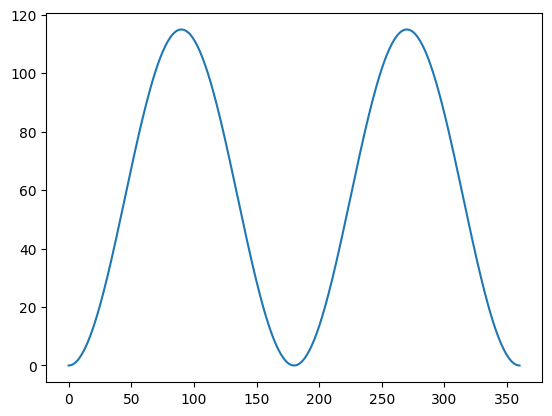

In [19]:
import numpy as np
import matplotlib.pyplot as plt

height = 2300

scale = 0.05

x = np.linspace(0, 360, 360)
y =  ((np.sin((x - 45) / 180 * 2 * np.pi) ) + 1)/2  *  (height * scale)

plt.plot(x, y)
plt.show()



In [20]:
len(y)

360

In [6]:


import numpy as np






from PIL import Image
img2 = Image.open('X_all.png')
img1 = np.array(img2)

img1[:,:,:3] = 255
img1[:,:,3] = 0
img1 = Image.fromarray(img1)

img2 = img2.resize((img1.width, img1.height))
img1.paste(img2, (0, 800), img2)
img1.save('RRRRRRR.png')

In [ ]:
  new_img = np.ones((new_height, new_width, img.shape[2]), np.uint8) * 255
        if img.shape[2] == 4:
            new_img[:,:,3] = 0